## Костюков Максим Сергеевич
Лабораторная работа номер 3
Введем начальные условия, узлы сетки и значения в них
Средствами sagemath введем переменую `x` и установим функцию
Установим также целевое `x` согласно варинату

0.200000000000000


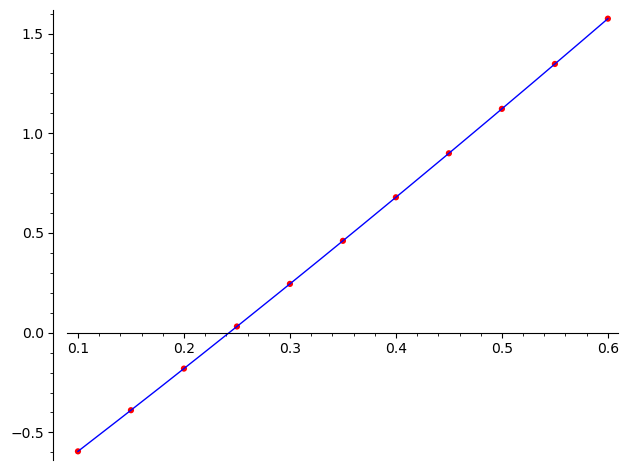

In [58]:
left_border = 0.1
right_border = 0.6
steps_count = 10
step = (right_border - left_border)/steps_count
x_axis = [left_border + i * step for i in range(steps_count + 1)]


x = var('x')
y = 4*x-cos(x)

values = [y(x=i) for i in x_axis]
p = y.plot(xmin=left_border, xmax=right_border)
p += point(zip(x_axis, values), color='red', pointsize=20)
target_x = x_axis[2]
print(target_x)
p.show()

Функция `lagrange` конструирует интерполяционный полином Лагранжа `n`-ого порядка.

In [70]:
h = var('h')
def lagrange(n, values, nodes):
    assert len(nodes) - 1 == n
    polinomial = 0
    for i in range(len(nodes)):
        sum_element = values[nodes[i]]
        for j in range(0, len(nodes)):
            if i!=j:
                sum_element *= (x-x_axis[j])/(h*(i-j))
        polinomial += sum_element
    return polinomial


In [79]:
closest_left_node = int((target_x - left_border) / step)
L4 = lagrange(4, values, [closest_left_node-2, closest_left_node-1, closest_left_node, closest_left_node+1, closest_left_node+2])
print(L4)

0.0101943129530998*(x - 0.100000000000000)*(x - 0.150000000000000)*(x - 0.200000000000000)*(x - 0.250000000000000)/h^4 - 0.00518126304822588*(x - 0.100000000000000)*(x - 0.150000000000000)*(x - 0.200000000000000)*(x - 0.300000000000000)/h^4 - 0.0450166444603104*(x - 0.100000000000000)*(x - 0.150000000000000)*(x - 0.250000000000000)*(x - 0.300000000000000)/h^4 + 0.0647951796560070*(x - 0.100000000000000)*(x - 0.200000000000000)*(x - 0.250000000000000)*(x - 0.300000000000000)/h^4 - 0.0247918402199177*(x - 0.150000000000000)*(x - 0.200000000000000)*(x - 0.250000000000000)*(x - 0.300000000000000)/h^4


In [80]:
L4_1 = diff(L4, x, 1)
print(L4_1)

0.00501304990487388*(x - 0.100000000000000)*(x - 0.150000000000000)*(x - 0.200000000000000)/h^4 - 0.0348223315072106*(x - 0.100000000000000)*(x - 0.150000000000000)*(x - 0.250000000000000)/h^4 + 0.0749894926091068*(x - 0.100000000000000)*(x - 0.200000000000000)*(x - 0.250000000000000)/h^4 - 0.0145975272668180*(x - 0.150000000000000)*(x - 0.200000000000000)*(x - 0.250000000000000)/h^4 - 0.0501979075085363*(x - 0.100000000000000)*(x - 0.150000000000000)*(x - 0.300000000000000)/h^4 + 0.0596139166077811*(x - 0.100000000000000)*(x - 0.200000000000000)*(x - 0.300000000000000)/h^4 - 0.0299731032681436*(x - 0.150000000000000)*(x - 0.200000000000000)*(x - 0.300000000000000)/h^4 + 0.0197785351956966*(x - 0.100000000000000)*(x - 0.250000000000000)*(x - 0.300000000000000)/h^4 - 0.0698084846802281*(x - 0.150000000000000)*(x - 0.250000000000000)*(x - 0.300000000000000)/h^4 + 0.0400033394360893*(x - 0.200000000000000)*(x - 0.250000000000000)*(x - 0.300000000000000)/h^4


In [85]:
print(L4_1(x=(2*h+0.1)))
print(L4_1(x=x_axis[2], h = step))
test = values[0]/(12*step)-2*values[1]/(3*step)+2*values[3]/(3*step)-values[4]/(12*step)
print(test)
print(diff(y,x,1)(x=target_x))

-0.0145975272668180*(2*h - 0.0500000000000000)*(2*h - 0.100000000000000)*(2*h - 0.150000000000000)/h^4 - 0.0299731032681436*(2*h - 0.0500000000000000)*(2*h - 0.100000000000000)*(2*h - 0.200000000000000)/h^4 - 0.0698084846802281*(2*h - 0.0500000000000000)*(2*h - 0.150000000000000)*(2*h - 0.200000000000000)/h^4 + 0.0400033394360893*(2*h - 0.100000000000000)*(2*h - 0.150000000000000)*(2*h - 0.200000000000000)/h^4 + 0.0100260998097478*(2*h - 0.0500000000000000)*(2*h - 0.100000000000000)/h^3 - 0.0696446630144213*(2*h - 0.0500000000000000)*(2*h - 0.150000000000000)/h^3 + 0.149978985218214*(2*h - 0.100000000000000)*(2*h - 0.150000000000000)/h^3 - 0.100395815017073*(2*h - 0.0500000000000000)*(2*h - 0.200000000000000)/h^3 + 0.119227833215562*(2*h - 0.100000000000000)*(2*h - 0.200000000000000)/h^3 + 0.0395570703913933*(2*h - 0.150000000000000)*(2*h - 0.200000000000000)/h^3
4.19866928941793
4.19866928941793
4.19866933079506


In [51]:
R5 = diff(y, x, 4+1)/factorial(4+1)*(x-x_axis[0])*(x-x_axis[1])*(x-x_axis[2])*(x-x_axis[3])*(x-x_axis[4])
R5_1 = diff(R5, x, 1)
print(R5_1)

1/120*(x - 0.100000000000000)*(x - 0.150000000000000)*(x - 0.200000000000000)*(x - 0.250000000000000)*(x - 0.300000000000000)*cos(x) + 1/120*(x - 0.100000000000000)*(x - 0.150000000000000)*(x - 0.200000000000000)*(x - 0.250000000000000)*sin(x) + 1/120*(x - 0.100000000000000)*(x - 0.150000000000000)*(x - 0.200000000000000)*(x - 0.300000000000000)*sin(x) + 1/120*(x - 0.100000000000000)*(x - 0.150000000000000)*(x - 0.250000000000000)*(x - 0.300000000000000)*sin(x) + 1/120*(x - 0.100000000000000)*(x - 0.200000000000000)*(x - 0.250000000000000)*(x - 0.300000000000000)*sin(x) + 1/120*(x - 0.150000000000000)*(x - 0.200000000000000)*(x - 0.250000000000000)*(x - 0.300000000000000)*sin(x)


In [52]:


minR5_1 = min(R5_1(x=x_axis[0]), R5_1(x=x_axis[1]), R5_1(x=x_axis[2]), R5_1(x=x_axis[3]), R5_1(x=x_axis[4]))
maxR5_1 = max(R5_1(x=x_axis[0]), R5_1(x=x_axis[1]), R5_1(x=x_axis[2]), R5_1(x=x_axis[3]), R5_1(x=x_axis[4]))

print(minR5_1)
print(maxR5_1)

-7.73137372670385e-8
3.69400258326675e-7


In [53]:
R = diff(y, x, 1)(x=target_x) - L4_1(x=2, h=step)

In [54]:
if (minR5_1 <= R and R <= maxR5_1):
    print("ЕЕЕЕ")
    print(minR5_1 <= R, R <= maxR5_1)